# Importing Libraries

In [1]:
#Data Manipulation-----------
import pandas as pd
import numpy as np

#Data Visualization----------
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

#Stats-----------------------
import statsmodels.api as sm
from scipy import stats

#Data Preprocessing-----------
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Model-----------------------
from sklearn.ensemble import RandomForestClassifier

#Metrics----------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

#Shap-------------------------
import shap

# Importing Data

In [2]:
df= pd.read_csv('/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv')

In [3]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


# Data Understanding & Cleaning 

In [4]:
#data size
df.shape

(5000, 13)

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
#Checking for Null values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

The Id's are unique and won't have great influence on the model, so leaving it as it is

In [7]:
#converting the dtype for Timestamp from object to datetime
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['Timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


Data type converted 

# EDA-1

* ****Univariate Analysis****

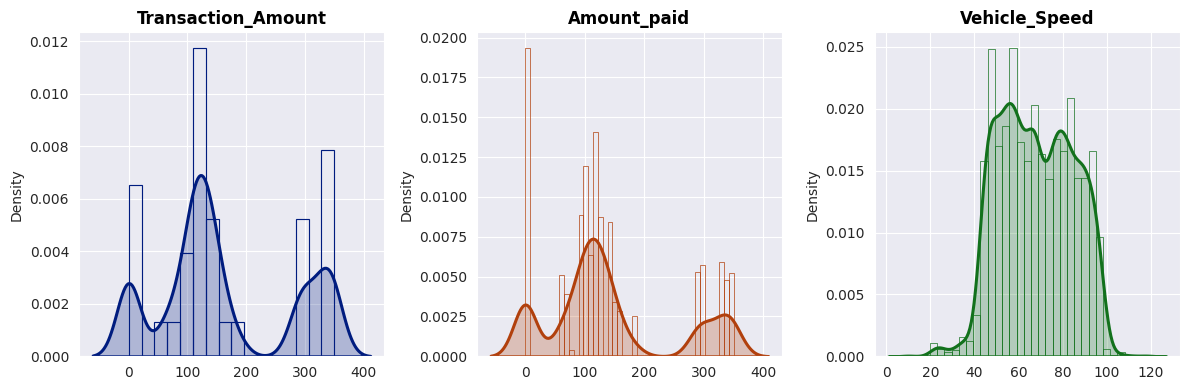

In [8]:
#for numerical features
numerical_columns= ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

sns.set_style('darkgrid')
colors= sns.color_palette(palette= 'dark', n_colors= len(numerical_columns))
fig, axs= plt.subplots(nrows= 1, ncols= 3, figsize=(12,4))
axs= axs.flat

for i,col in enumerate(numerical_columns):
    sns.kdeplot(df, x= col, color= colors[i], fill= True, linewidth= 2.2, ax= axs[i])
    sns.histplot(df, x=col, color= colors[i], fill= False, stat= 'density', ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col, color= 'black', fontweight= 'bold')
    
fig.tight_layout()
fig.show()

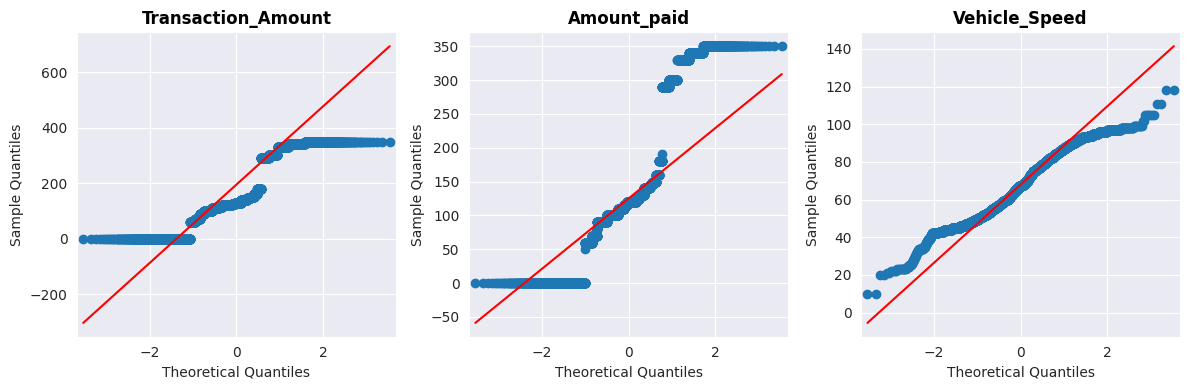

In [9]:
fig, axs= plt.subplots(nrows= 1, ncols= 3, figsize=(12,4))
axs= axs.flat

for i, col in enumerate(numerical_columns):
    sm.qqplot(df[col], line= 'q', ax=axs[i])
    axs[i].set_title(col, color= 'black', fontweight= 'bold')

fig.tight_layout()
fig.show()

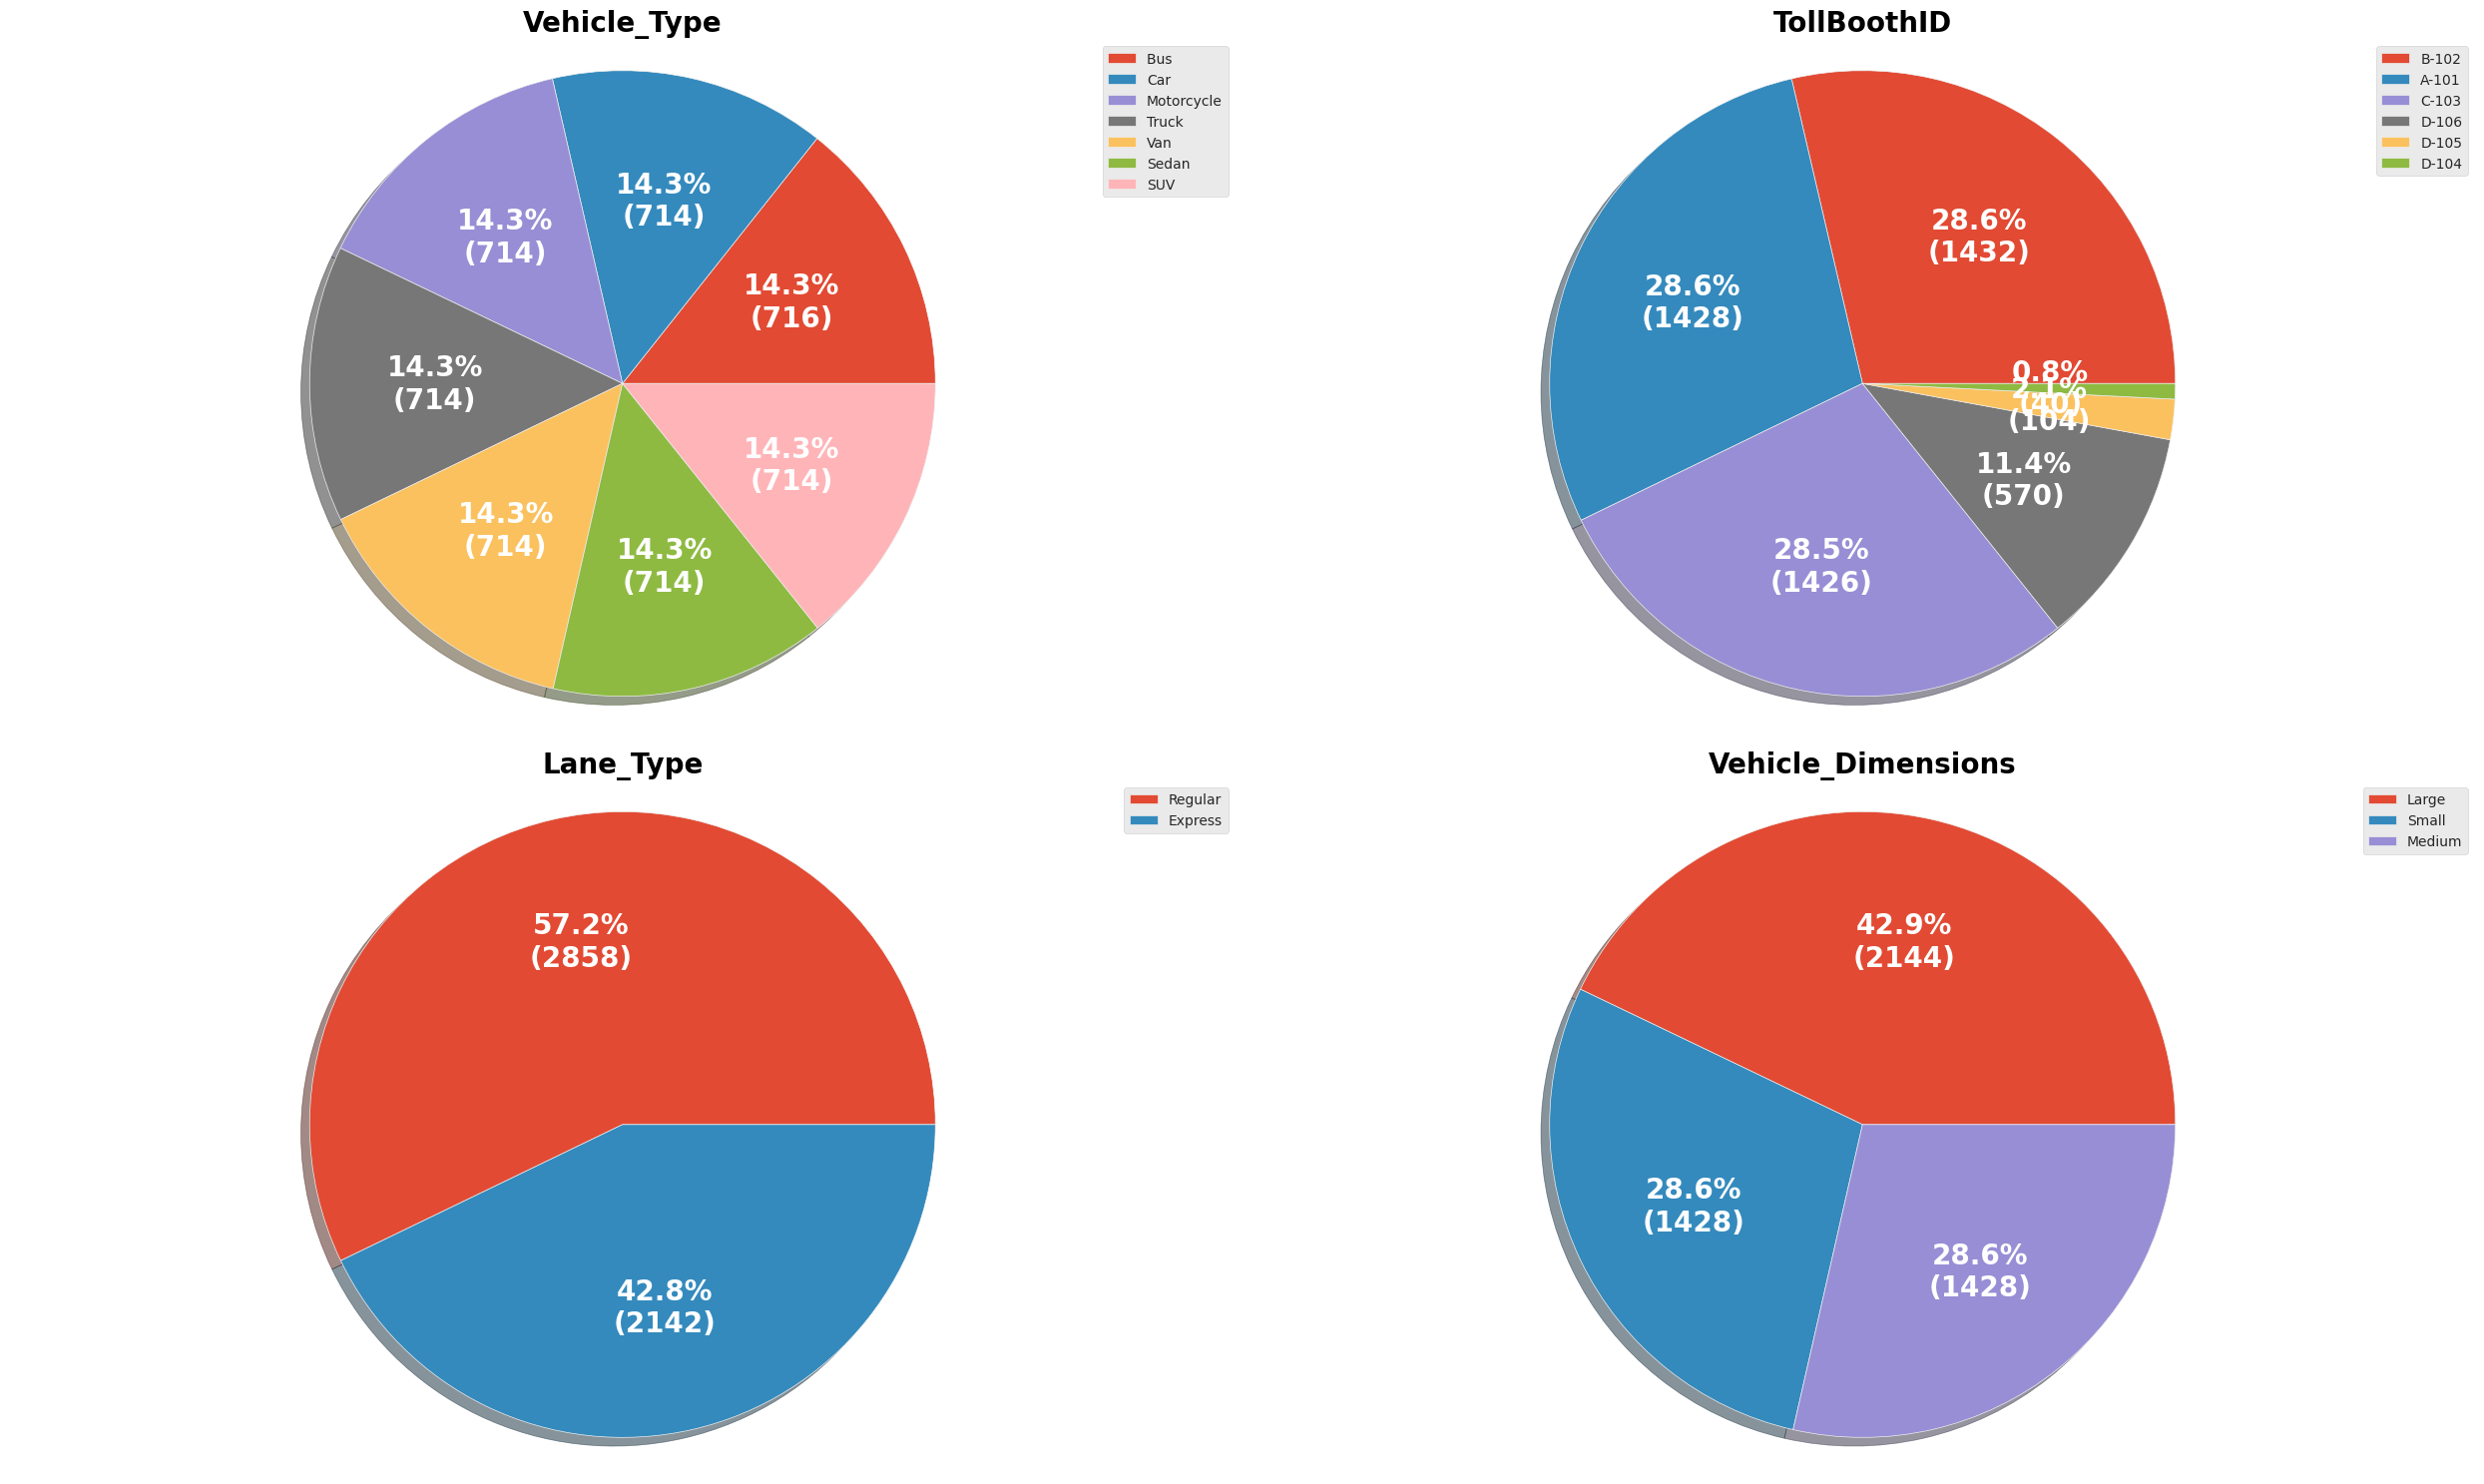

In [10]:
#for categorical features
categorical_columns= ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions']

plt.style.use('ggplot')
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize = (25,15))
ax = ax.flat

for i,col in enumerate(categorical_columns):
    df_class = df[col].value_counts().to_frame()
    labels = df_class.index
    values = df_class.iloc[:,0].to_list()
    ax[i].pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':20, 'fontweight':'bold'})
    ax[i].legend(labels)
    ax[i].set_title(col, fontsize = 20, fontweight = "bold", color = "black")
    ax[i].axis('equal')
    ax[i].legend(loc = 'best')

fig.tight_layout()
fig.show()

* ****Bivariate Analysis****

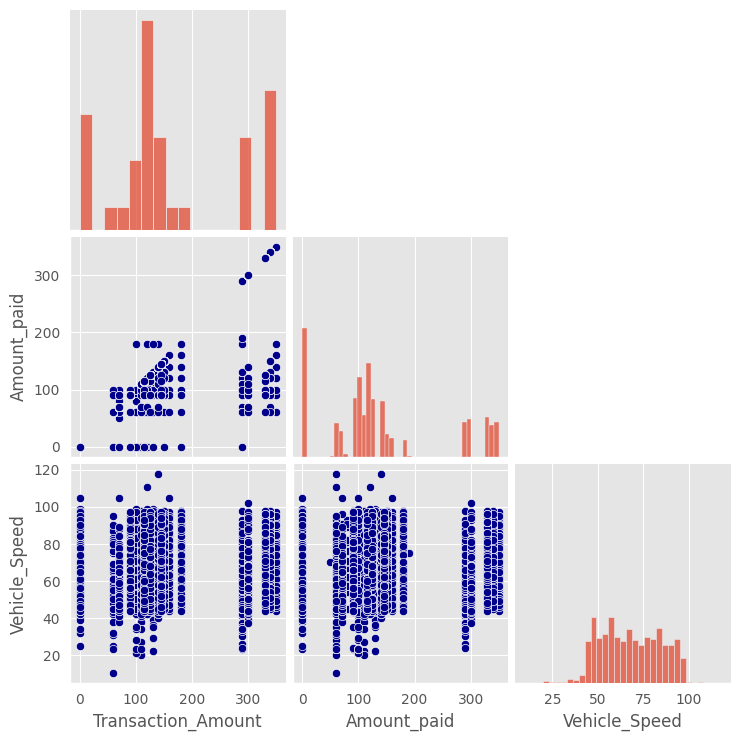

In [11]:
#for numerical features
sns.pairplot(df[numerical_columns], corner= True, plot_kws= {'color':'darkblue'})
plt.show()

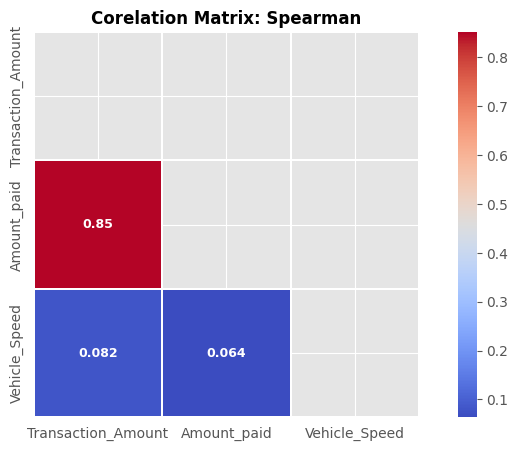

In [12]:
corr_matrix = df[numerical_columns].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix, cmap = 'coolwarm', 
            annot = True, mask = mask, 
            square = True, annot_kws = {'fontsize':9, 'fontweight':'bold'}, 
            linewidths = 1.1)

plt.title("Corelation Matrix: Spearman", fontsize = 12, fontweight = 'bold', color = 'black')
plt.show()

# Feature Engineering

In [13]:
#feature engineering on Timestamp
df['Hour']= df['Timestamp'].dt.hour
df['DayOfWeek']= df["Timestamp"].dt.dayofweek
df['Month']= df['Timestamp'].dt.month

In [14]:
#encoding categorical variables
categorical_columns = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']
lb= LabelEncoder()

for col in categorical_columns:
    df[col]= lb.fit_transform(df[col].astype(str))


In [15]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,0,2,0,0,0,350,120,3,65,1482,0,11,4,1
1,2,2023-01-07 14:55:00,1,9,1,1,2,120,100,3,78,3066,0,14,5,1
2,3,2023-01-08 18:25:00,2,4451,3,1,2,0,0,3,53,3663,1,18,6,1
3,4,2023-01-09 02:05:00,5,241,2,1,0,350,120,3,92,1498,0,2,0,1
4,5,2023-01-10 06:35:00,6,2860,1,0,1,140,100,3,60,2409,0,6,1,1


Categorical values transformed to numerical values

In [16]:
#dropping column timestamp
df=df.drop('Timestamp', axis=1)

# EDA-2 

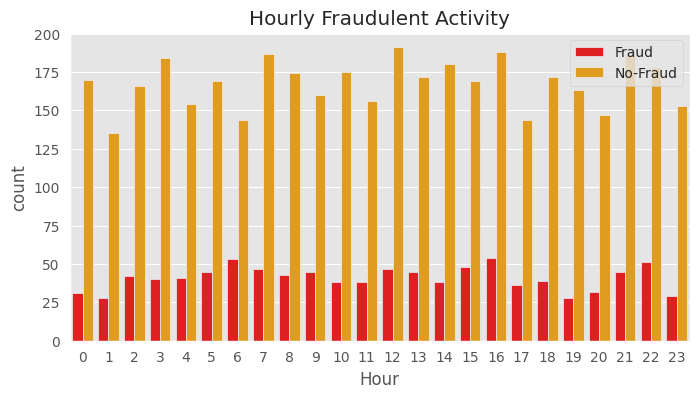

In [17]:
#Fraudulent transaction by hour
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='Hour', hue='Fraud_indicator', palette= ['red', 'orange'])
plt.title('Hourly Fraudulent Activity')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
plt.show()

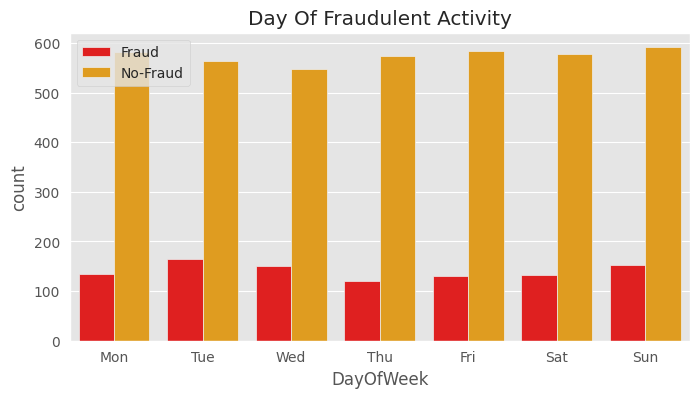

In [18]:
#Fraudulent transaction by day of week
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='DayOfWeek', hue='Fraud_indicator', palette= ['red', 'orange'])
plt.title('Day Of Fraudulent Activity')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed', 'Thu', 'Fri', 'Sat','Sun'])
plt.show()

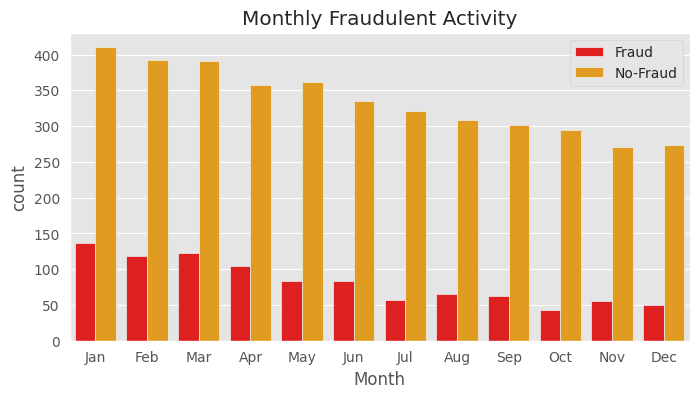

In [19]:
#Fraudulent transaction by month
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='Month', hue='Fraud_indicator', palette= ['red', 'orange'])
plt.title('Monthly Fraudulent Activity')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

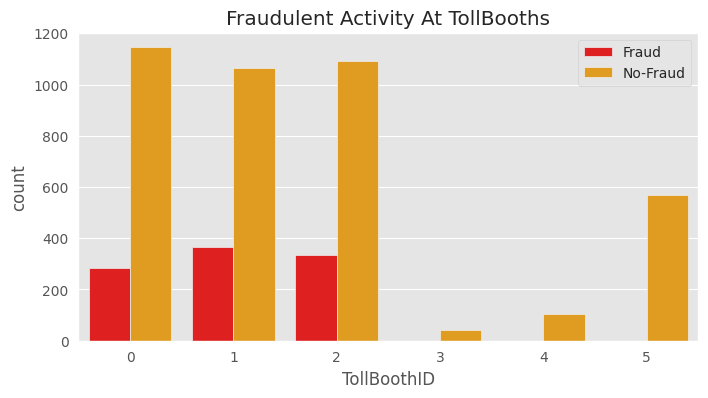

In [20]:
#Fraudulent transaction by tollbooth
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='TollBoothID', hue='Fraud_indicator', palette= ['red', 'orange'])
plt.title('Fraudulent Activity At TollBooths')
label=['Fraud', 'No-Fraud']
plt.legend(labels=label)
#plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

interval columns not set, guessing: ['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid', 'Geographical_Location', 'Vehicle_Speed', 'Vehicle_Plate_Number', 'Fraud_indicator', 'Hour', 'DayOfWeek', 'Month']


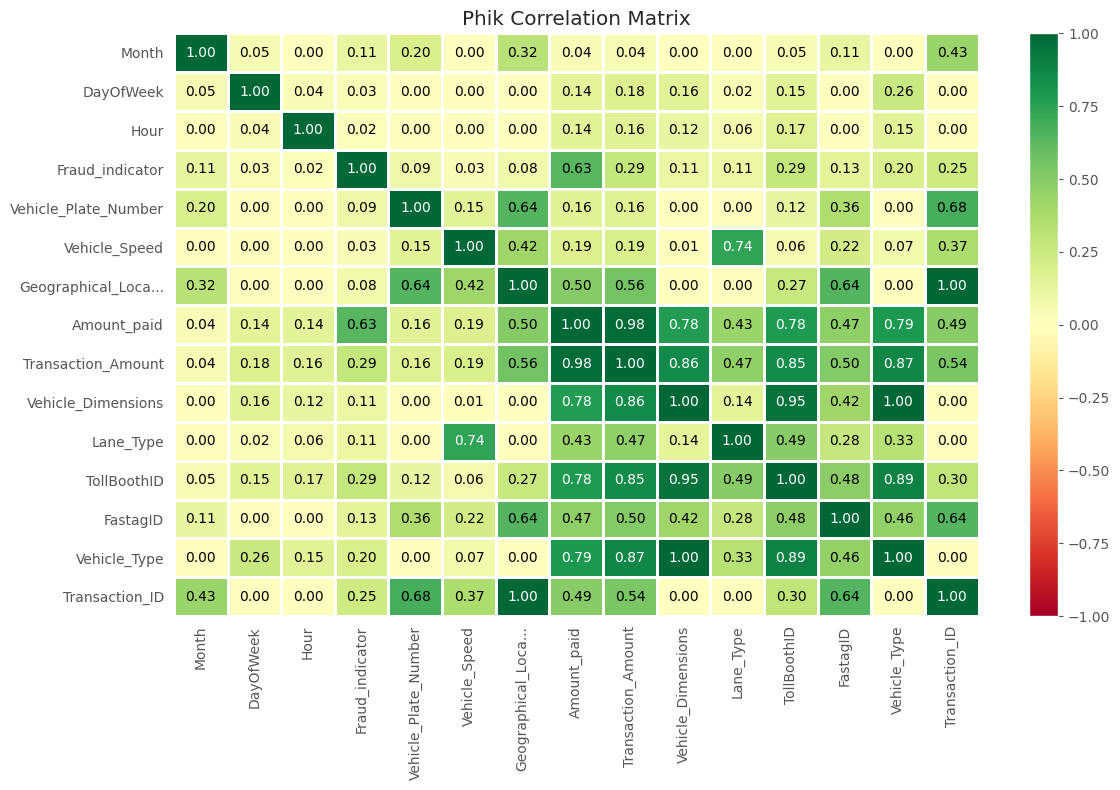

In [21]:
phik_corr_matrix = df.phik_matrix()

# Validate and convert the correlation matrix
if not isinstance(phik_corr_matrix, np.ndarray):
    phik_corr_matrix = phik_corr_matrix.to_numpy()

# Getting the labels for the matrix
x_labels = df.columns.tolist()
y_labels = df.columns.tolist()

# Plotting the phik correlation matrix
plot_correlation_matrix(phik_corr_matrix, x_labels=x_labels, y_labels=y_labels, figsize=(12, 8))
plt.title('Phik Correlation Matrix')
plt.show()

# Data Preprocessing

In [22]:
#preparing training and testing samples
X= df.drop('Fraud_indicator', axis=1)
y= df['Fraud_indicator']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=20)

In [23]:
#scaling the training samples
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Model

In [24]:
#training the model
model= RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [25]:
#making predictions
y_predicted= model.predict(X_test)

# Metrics

In [26]:
#evaluation metrics
metrics= [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
results= {}

for i in metrics:
    metric_name= i.__name__
    score= i(y_test, y_predicted)
    results[metric_name] = score

print(results)

{'accuracy_score': 0.9872, 'precision_score': 0.9844660194174757, 'recall_score': 1.0, 'f1_score': 0.9921722113502935, 'roc_auc_score': 0.9661016949152542}


In [27]:
#creating dataframe
score= pd.DataFrame(list(results.items()), columns=['Metric', 'Score'])
score

,Metric,Score
0,accuracy_score,0.987200
1,precision_score,0.984466
2,recall_score,1.000000
3,f1_score,0.992172
4,roc_auc_score,0.966102


# Feature Importance

In [28]:
#Important features
imp= model.feature_importances_
feature_name= X.columns

#creating a dataframe for the important features
imp_features= pd.DataFrame({'Feature Name': feature_name,
                            'Importance': imp})

In [29]:
#sorting on importance
imp_features= imp_features.sort_values(by= 'Importance', ascending= False)
imp_features

,Feature Name,Importance
7,Amount_paid,0.419346
6,Transaction_Amount,0.158114
0,Transaction_ID,0.063379
3,TollBoothID,0.061070
5,Vehicle_Dimensions,0.052509
2,FastagID,0.047898
1,Vehicle_Type,0.045069
10,Vehicle_Plate_Number,0.036689
9,Vehicle_Speed,0.029105
11,Hour,0.025315


These features are sorted in their order of importance. Basically the features having the highest influence on the model's decision making are at the top of the dataframe

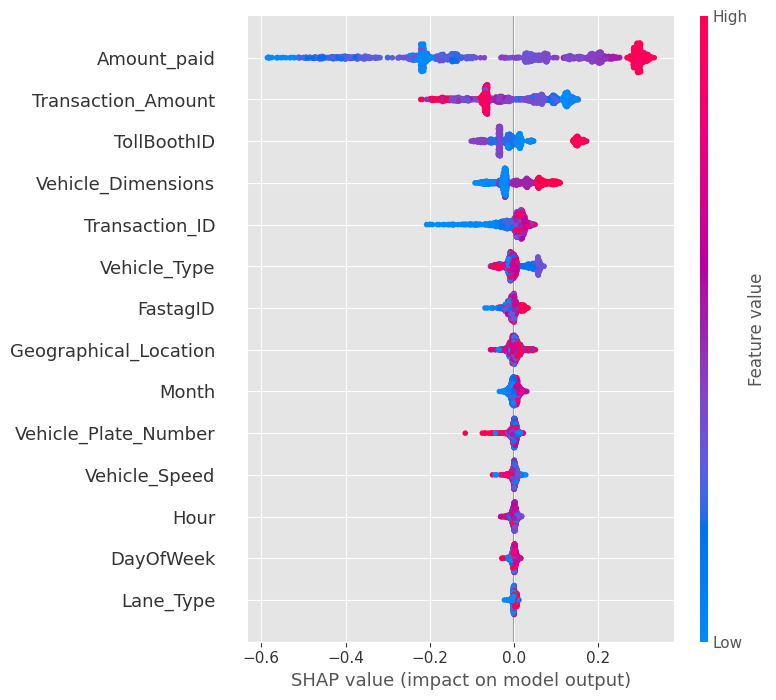

In [30]:
#using SHAP to to visualize the contribution of features in model's decision making
explainer= shap.TreeExplainer(model)
shap_values= explainer.shap_values(X_test)

class_index= 1
shap.summary_plot(shap_values[class_index], X_test, feature_names= X.columns)